Project: Customer segmentation Using K-Means Clustering with Python

This project involves building an algorithm that clusters customers of a shopping mall into different groups. It uses the theory of classification regression problems.

It involves customer data, data pre-processing and data analysis. The optmum number of clusters is obtained in data analysis using sum of squares. The K-means algorithom groups the data depending on the algorithm. The cluster of the data has also been visualized.

importing the Dependencies

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

Data Handling

Calling the data

In [42]:
Customers_data = pd.read_csv('Downloads/archive (7)/Mall_Customers.csv')

Viewing the first 10 rows in the data

In [6]:
Customers_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Showing the distribution of the data basing on the number of rows and columns.
On running the code below, the output is (200, 5) meaning that the data has 5 variables (comuns) and 200 observations in each variable (rows). Customers_data.shape

Obtaining more information on the data

On running the code below, the output shows the distribution of the data basing on the occurrences of each observation of each variable and also the type of the value (observation). 

In [8]:
Customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking for the missing values

In [14]:
Customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data sorting

Choosing the annual income and spending score columns from the data then assigning them to "P"

In [16]:
P = Customers_data.iloc[:,[3,4]].values
print(P)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters. For this data, I have chosen to cluster using sum of squares, so I will use within clusters sum of squares.

Finding the within clusters sum of squares for the different number of clusters.

In [35]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(P)
    wcss.append(kmeans.inertia_)

Plotting an elbow graph

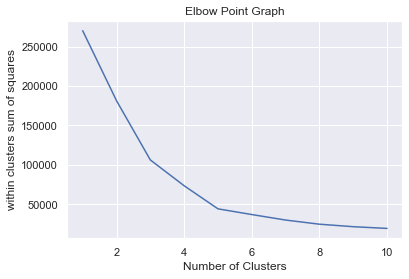

In [39]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('within clusters sum of squares')
plt.show()

On plotting the graoh, the cluster is found to be 5= 0,1,2,3,4

Training the k=Means Clustering Model

In [45]:
kmeans =KMeans(n_clusters=5, init='k-means++', random_state=0)

#To return the label for each data point basing on the cluster
X = kmeans.fit_predict(P)

print (X)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visulizing the Ckusters

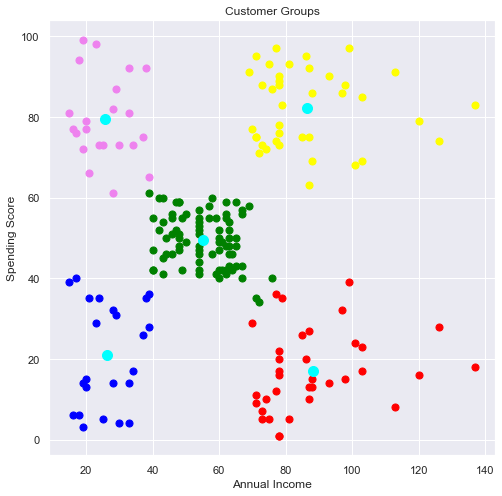

In [48]:
# Plotting all the clusetrs and the Centroids
plt.figure(figsize=(8,8))
plt.scatter(P[X==0,0], P[X==0,1], s=50, c='red', label='First Cluster')
plt.scatter(P[X==1,0], P[X==1,1], s=50, c='green', label='Second Cluster')
plt.scatter(P[X==2,0], P[X==2,1], s=50, c='yellow', label='Third Cluster')
plt.scatter(P[X==3,0], P[X==3,1], s=50, c='violet', label='Fourth Cluster')
plt.scatter(P[X==4,0], P[X==4,1], s=50, c='blue', label='Fifth Cluster')

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The plot shows the distribution of the rates of consumption based on the amount of income for the customers.